
# Project: Predict Bike Sharing Demand with AutoGluon
## Understand Data


### Data Fields
* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rental

## Download the Kaggle dataset using the kaggle python library

 **Setting Kaggle API Key & API token file are complete**

### Download and explore dataset

In [1]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand -p /Users/murali/workspace/balanzer/kaggle/data

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)



### Loading necessary libraries for EDA

Load all standard python library packages.

#### Data Manipulation
* Numpy
* Pandas

#### Data Visualization
* matplotlib.pyplot
* seaborn


In [2]:
import warnings

warnings.filterwarnings("ignore")


# this will help in making the Python code more structured automatically
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor
import autogluon.core as ag

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def genrerate_submit_data(model_to_predict, file_name="submission.csv"):
    print(f"genrating {file_name} for kaggle submission\n")
    submit_data = pd.DataFrame(test_orig["datetime"], columns=["datetime"])

    y_pred = model_to_predict.predict(data_test)

    # submit_data["count"] = y_pred
    submit_data["count"] = np.round(y_pred)
    # check sum of negative values
    print("Total negative values : \n")
    print(submit_data[submit_data["count"] < 0].count())

    # check how many negative values
    submit_data["count"] = submit_data["count"].apply(lambda x: x if x > 0 else 0)

    print("\nAfter replace negative values : \n")
    print(submit_data[submit_data["count"] < 0].count())

    submit_data.to_csv(file_name, index=False)
    display(submit_data.sample(10))
    print(f"\ncsv file {file_name} generated")

<IPython.core.display.Javascript object>

In [3]:
# reading bike sharing train.csv data and load to data frame
train_orig = pd.read_csv("train.csv")
test_orig = pd.read_csv("test.csv")
# copying orignal data so that when changing data we dont lose original
data = train_orig.copy()
# copying orignal data so that when changing data we dont lose original
data_test = test_orig.copy()

<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [4]:
data.shape

(10886, 12)

<IPython.core.display.Javascript object>

### Check the data types of the columns in the dataset.

checking data types of all columns 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [6]:
data.head(5)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

<IPython.core.display.Javascript object>

In [7]:
data.tail(5)

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

<IPython.core.display.Javascript object>

### Summary of the data

In [8]:
data.describe().T

count        mean         std   min      25%      50%       75%  \
season      10886.0    2.506614    1.116174  1.00   2.0000    3.000    4.0000   
holiday     10886.0    0.028569    0.166599  0.00   0.0000    0.000    0.0000   
workingday  10886.0    0.680875    0.466159  0.00   0.0000    1.000    1.0000   
weather     10886.0    1.418427    0.633839  1.00   1.0000    1.000    2.0000   
temp        10886.0   20.230860    7.791590  0.82  13.9400   20.500   26.2400   
atemp       10886.0   23.655084    8.474601  0.76  16.6650   24.240   31.0600   
humidity    10886.0   61.886460   19.245033  0.00  47.0000   62.000   77.0000   
windspeed   10886.0   12.799395    8.164537  0.00   7.0015   12.998   16.9979   
casual      10886.0   36.021955   49.960477  0.00   4.0000   17.000   49.0000   
registered  10886.0  155.552177  151.039033  0.00  36.0000  118.000  222.0000   
count       10886.0  191.574132  181.144454  1.00  42.0000  145.000  284.0000   

                 max  
season        4.0000  
holiday       1.0000  
workingday    1.0000  
weather       4.0000  
temp         41.0000  
atemp        45.4550  
humidity    100.0000  
windspeed    56.9969  
casual      367.0000  
registered  886.0000  
count       977.0000

<IPython.core.display.Javascript object>

In [9]:
data.describe(include="object").T

count unique                  top freq
datetime  10886  10886  2011-07-03 00:00:00    1

<IPython.core.display.Javascript object>

###  Check for Duplicates 
lets check for any duplicate values

In [10]:
# check for any duplicate data
data[data.duplicated()]

Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []

<IPython.core.display.Javascript object>

In [11]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) & % for all columns in input data frame
    """

    nullInfo = {"missing count": df.isnull().sum(), "missing %": df.isnull().mean()}
    # Creates pandas DataFrame.
    nulldata = pd.DataFrame(nullInfo)
    return nulldata[nulldata["missing count"] > 0].sort_values(
        by="missing count", ascending=False
    )


print_null_info(data)

Empty DataFrame
Columns: [missing count, missing %]
Index: []

<IPython.core.display.Javascript object>

In [12]:
## Deleting columns not in test

data.drop("registered", inplace=True, axis=1)
data.drop("casual", inplace=True, axis=1)

<IPython.core.display.Javascript object>

In [13]:
# Converting to data time

data["datetime"] = pd.to_datetime(data["datetime"])
data_test["datetime"] = pd.to_datetime(data_test["datetime"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


<IPython.core.display.Javascript object>

## Histogram All Features

#### To Understand Data Distribution 

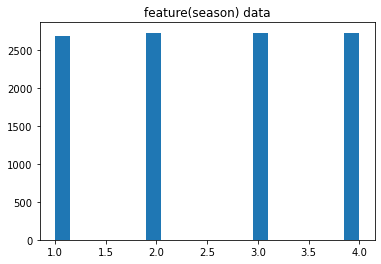

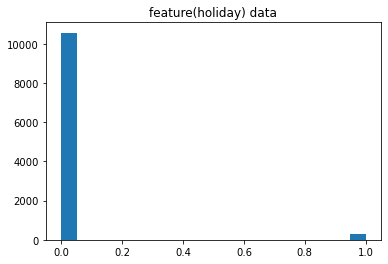

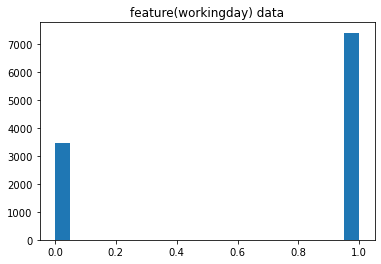

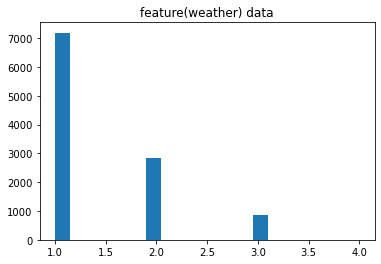

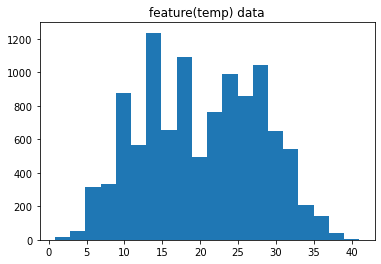

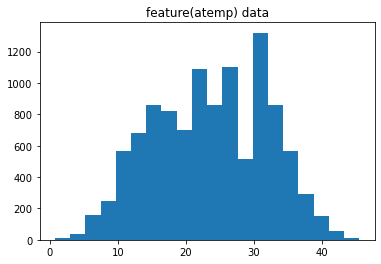

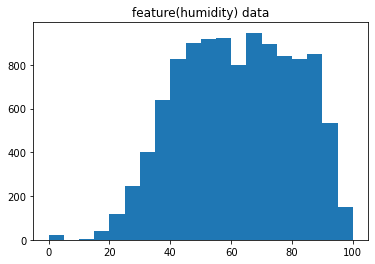

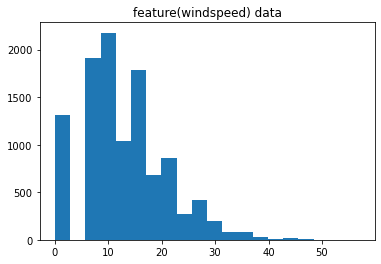

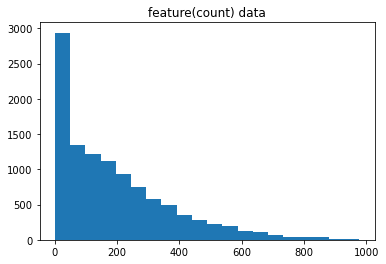

<IPython.core.display.Javascript object>

In [14]:
cols_to_log = ["season", "holiday", "workingday","weather", "temp", "atemp","humidity", "windspeed", "count"]
for colname in cols_to_log:
    plt.hist(data[colname], bins=20)
    plt.title(f'feature({colname}) data')
    plt.show()


## Inital Model - Train a model using AutoGluon’s Tabular Prediction - with no features

In [15]:
# split data

# Separating features and the target column
X = data.copy()


# Splitting the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.20, random_state=1, shuffle=True)

X_train, X_val = train_test_split(X_train, test_size=0.25, random_state=1, shuffle=True)

print(X_train.shape, X_val.shape, X_test.shape, data_test.shape)

(6531, 10) (2177, 10) (2178, 10) (6493, 9)


<IPython.core.display.Javascript object>

In [16]:
label = "count"
save_path = "/Users/murali/tmp/bike_preduction_models/"
time_limit=120

predictor_default= TabularPredictor(
    label=label, problem_type="regression", eval_metric="root_mean_squared_error", path=save_path
).fit(train_data=X_train,presets= "best_quality",verbosity=1, time_limit=time_limit)



AutoGluon will gauge predictive performance using evaluation metric: 'root_mean_squared_error'
		`import lightgbm` failed. If you are using Mac OSX, Please try 'brew install libomp'. Detailed info: dlopen(/Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)
		`import lightgbm` failed. If you are using Mac OSX, Please try 'brew install libomp'. Detailed info: dlopen(/Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/loc

		`import lightgbm` failed. If you are using Mac OSX, Please try 'brew install libomp'. Detailed info: dlopen(/Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)


<IPython.core.display.Javascript object>

In [17]:
predictor_default.leaderboard(X_train, silent=True)

model  score_test   score_val  pred_time_test  \
0   RandomForestMSE_BAG_L1  -47.775843 -129.974284        0.118668   
1     ExtraTreesMSE_BAG_L1  -49.486275 -134.527512        0.145532   
2    KNeighborsDist_BAG_L1  -57.784959 -170.379650        0.018336   
3      WeightedEnsemble_L2  -68.604650 -128.749897        0.713318   
4   NeuralNetFastAI_BAG_L2  -82.494877 -127.946302        3.131294   
5      WeightedEnsemble_L3  -84.058703 -126.968208        3.247775   
6          CatBoost_BAG_L2  -86.100652 -127.651573        2.579186   
7     ExtraTreesMSE_BAG_L2  -88.630353 -129.495502        2.635041   
8   RandomForestMSE_BAG_L2  -89.991111 -131.371927        2.653845   
9          CatBoost_BAG_L1 -112.386856 -134.173745        0.037226   
10   KNeighborsUnif_BAG_L1 -131.090903 -161.178257        0.020165   
11  NeuralNetFastAI_BAG_L1 -131.851340 -138.635724        0.555401   
12   NeuralNetMXNet_BAG_L1 -151.082221 -166.768155        1.654197   

    pred_time_val    fit_time  pred_time_test_marginal  \
0        0.200341    0.684844                 0.118668   
1        0.199952    0.477380                 0.145532   
2        0.020993    0.004589                 0.018336   
3        0.328748   57.445428                 0.002023   
4        1.475361  106.726164                 0.581769   
5        1.702011  114.096991                 0.001304   
6        1.374644   84.130393                 0.029661   
7        1.557350   77.984017                 0.085516   
8        1.559069   79.230139                 0.104320   
9        0.021320   17.398912                 0.037226   
10       0.019464    0.005486                 0.020165   
11       0.106826   39.234069                 0.555401   
12       0.783907   19.607232                 1.654197   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.200341           0.684844            1       True   
1                 0.199952           0.477380            1       True   
2                 0.020993           0.004589            1       True   
3                 0.000261           0.127603            2       True   
4                 0.122559          29.313652            2       True   
5                 0.000261           0.081441            3       True   
6                 0.021842           6.717881            2       True   
7                 0.204548           0.571505            2       True   
8                 0.206267           1.817626            2       True   
9                 0.021320          17.398912            1       True   
10                0.019464           0.005486            1       True   
11                0.106826          39.234069            1       True   
12                0.783907          19.607232            1       True   

    fit_order  
0           3  
1           5  
2           2  
3           8  
4          12  
5          13  
6          10  
7          11  
8           9  
9           4  
10          1  
11          6  
12          7

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='model'>

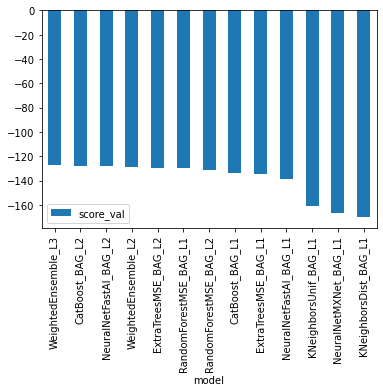

<IPython.core.display.Javascript object>

In [18]:
# Output the model's `score_val` in a bar chart to compare performance
predictor_default.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [19]:
# Evaluate the models performance on the test dataset
performance = predictor_default.evaluate(X_test)
performance

{'root_mean_squared_error': -130.03564304969476,
 'mean_squared_error': -16909.268463347737,
 'mean_absolute_error': -89.69565330064002,
 'r2': 0.5041289692763076,
 'pearsonr': 0.7100884941690905,
 'median_absolute_error': -59.740936279296875}

<IPython.core.display.Javascript object>

In [20]:
file_name = "predictor_default.csv"
genrerate_submit_data(predictor_default, file_name)

genrating predictor_default.csv for kaggle submission

Total negative values : 

datetime    0
count       0
dtype: int64

After replace negative values : 

datetime    0
count       0
dtype: int64


datetime  count
770   2011-04-21 02:00:00  195.0
496   2011-03-21 13:00:00  188.0
3796  2012-03-22 00:00:00  132.0
5929  2012-10-31 09:00:00  123.0
1088  2011-05-23 08:00:00  168.0
6475  2012-12-31 06:00:00  130.0
5895  2012-10-28 11:00:00  398.0
689   2011-03-29 17:00:00  144.0
810   2011-04-22 18:00:00   46.0
1542  2011-06-30 06:00:00  159.0


csv file predictor_default.csv generated


<IPython.core.display.Javascript object>

#### Submit to  competition's page  - `My Submissions`

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f predictor_default.csv -m "default autogluon.tabular"

100%|█████████████████████████████████████████| 164k/164k [00:01<00:00, 113kB/s]
Successfully submitted to Bike Sharing Demand

<IPython.core.display.Javascript object>

In [22]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                        date                 description                                  status    publicScore  privateScore  
------------------------------  -------------------  -------------------------------------------  --------  -----------  ------------  
predictor_default.csv           2021-11-24 19:08:01  default autogluon.tabular                    complete  1.32582      1.32582       


<IPython.core.display.Javascript object>

### Observation on Initial Model

#### Initial score of  `1.32` and with `'root_mean_squared_error': -129.89`  - we have to look for more improvement options in next phases 

## Exploratory Data Analysis and Creating an additional feature

In [23]:
# Extracting features from datetime
data["dt_hour"] = data["datetime"].dt.hour
data["dt_year"] = data["datetime"].dt.year
data["dt_month"] = data["datetime"].dt.month
data["dt_day"] = data["datetime"].dt.day
data["dt_dayofweek"] = data["datetime"].dt.dayofweek
data["dt_quarter"] = data["datetime"].dt.quarter

## submission data 

data_test["dt_hour"] = data_test["datetime"].dt.hour
data_test["dt_year"] = data_test["datetime"].dt.year
data_test["dt_month"] = data_test["datetime"].dt.month
data_test["dt_day"] = data_test["datetime"].dt.day
data_test["dt_dayofweek"] = data_test["datetime"].dt.dayofweek
data_test["dt_quarter"] = data_test["datetime"].dt.quarter


<IPython.core.display.Javascript object>

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  int64         
 2   holiday       10886 non-null  int64         
 3   workingday    10886 non-null  int64         
 4   weather       10886 non-null  int64         
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   count         10886 non-null  int64         
 10  dt_hour       10886 non-null  int64         
 11  dt_year       10886 non-null  int64         
 12  dt_month      10886 non-null  int64         
 13  dt_day        10886 non-null  int64         
 14  dt_dayofweek  10886 non-null  int64         
 15  dt_quarter    10886 non-null  int64 

<IPython.core.display.Javascript object>

In [25]:
data.sample(10)

datetime  season  holiday  workingday  weather   temp   atemp  \
4827 2011-11-14 05:00:00       4        0           1        2  18.04  21.970   
5117 2011-12-07 07:00:00       4        0           1        3  18.04  21.970   
1953 2011-05-08 07:00:00       2        0           0        2  18.86  22.725   
8732 2012-08-06 05:00:00       3        0           1        1  28.70  33.335   
768  2011-02-15 10:00:00       1        0           1        1   9.84  10.605   
7101 2012-04-14 06:00:00       2        0           0        1  13.94  16.665   
950  2011-03-04 01:00:00       1        0           1        2   7.38   9.090   
2195 2011-05-18 09:00:00       2        0           1        3  22.96  26.515   
8711 2012-08-05 08:00:00       3        0           0        1  31.16  36.365   
2101 2011-05-14 11:00:00       2        0           0        2  21.32  25.000   

      humidity  windspeed  count  dt_hour  dt_year  dt_month  dt_day  \
4827        67    16.9979     19        5     2011        11      14   
5117       100     7.0015     46        7     2011        12       7   
1953        82     0.0000     23        7     2011         5       8   
8732        79    12.9980     25        5     2012         8       6   
768         27    19.0012     52       10     2011         2      15   
7101        76    11.0014     21        6     2012         4      14   
950         64    12.9980      4        1     2011         3       4   
2195        83    16.9979    202        9     2011         5      18   
8711        66    22.0028    108        8     2012         8       5   
2101        94     8.9981    279       11     2011         5      14   

      dt_dayofweek  dt_quarter  
4827             0           4  
5117             2           4  
1953             6           2  
8732             0           3  
768              1           1  
7101             5           2  
950              4           1  
2195             2           2  
8711             6           3  
2101             5           2

<IPython.core.display.Javascript object>

In [26]:
## Deleting datetime column
data.drop("datetime", inplace=True, axis=1)
data_test.drop("datetime", inplace=True, axis=1)

<IPython.core.display.Javascript object>

### Summary of the data

In [27]:
data.describe().T

count         mean         std      min        25%       50%  \
season        10886.0     2.506614    1.116174     1.00     2.0000     3.000   
holiday       10886.0     0.028569    0.166599     0.00     0.0000     0.000   
workingday    10886.0     0.680875    0.466159     0.00     0.0000     1.000   
weather       10886.0     1.418427    0.633839     1.00     1.0000     1.000   
temp          10886.0    20.230860    7.791590     0.82    13.9400    20.500   
atemp         10886.0    23.655084    8.474601     0.76    16.6650    24.240   
humidity      10886.0    61.886460   19.245033     0.00    47.0000    62.000   
windspeed     10886.0    12.799395    8.164537     0.00     7.0015    12.998   
count         10886.0   191.574132  181.144454     1.00    42.0000   145.000   
dt_hour       10886.0    11.541613    6.915838     0.00     6.0000    12.000   
dt_year       10886.0  2011.501929    0.500019  2011.00  2011.0000  2012.000   
dt_month      10886.0     6.521495    3.444373     1.00     4.0000     7.000   
dt_day        10886.0     9.992559    5.476608     1.00     5.0000    10.000   
dt_dayofweek  10886.0     3.013963    2.004585     0.00     1.0000     3.000   
dt_quarter    10886.0     2.506614    1.116174     1.00     2.0000     3.000   

                    75%        max  
season           4.0000     4.0000  
holiday          0.0000     1.0000  
workingday       1.0000     1.0000  
weather          2.0000     4.0000  
temp            26.2400    41.0000  
atemp           31.0600    45.4550  
humidity        77.0000   100.0000  
windspeed       16.9979    56.9969  
count          284.0000   977.0000  
dt_hour         18.0000    23.0000  
dt_year       2012.0000  2012.0000  
dt_month        10.0000    12.0000  
dt_day          15.0000    19.0000  
dt_dayofweek     5.0000     6.0000  
dt_quarter       4.0000     4.0000

<IPython.core.display.Javascript object>

## Bivariate Analysis

### Data correlation analysis

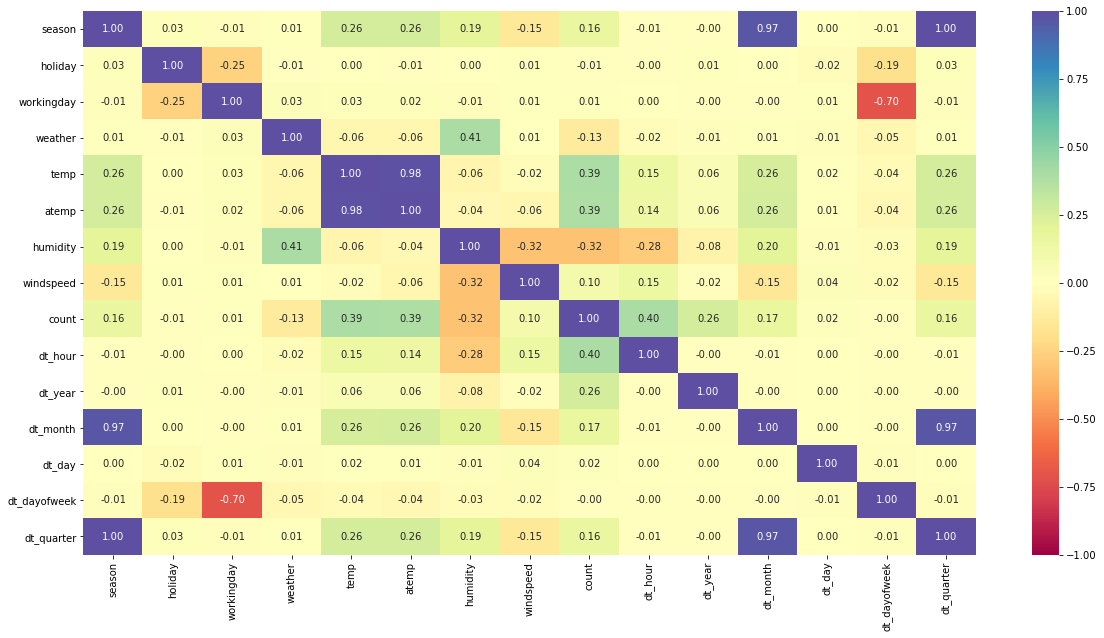

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [29]:

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
## Dropping high corelated columns

data.drop("dt_quarter", inplace=True, axis=1)
data.drop("dt_day", inplace=True, axis=1)
data.drop("dt_year", inplace=True, axis=1)
data.drop("temp", inplace=True, axis=1)

## Delete from submission data
data_test.drop("dt_quarter", inplace=True, axis=1)
data_test.drop("dt_day", inplace=True, axis=1)
data_test.drop("dt_year", inplace=True, axis=1)
data_test.drop("temp", inplace=True, axis=1)




<IPython.core.display.Javascript object>

### convert static numerical to category types 

In [30]:
category_cols = [
    "season",
    "holiday",
    "workingday",
    "weather",
]

data[category_cols] = data[category_cols].astype("category")
data_test[category_cols] = data_test[category_cols].astype("category")

<IPython.core.display.Javascript object>

### Pair Plot 

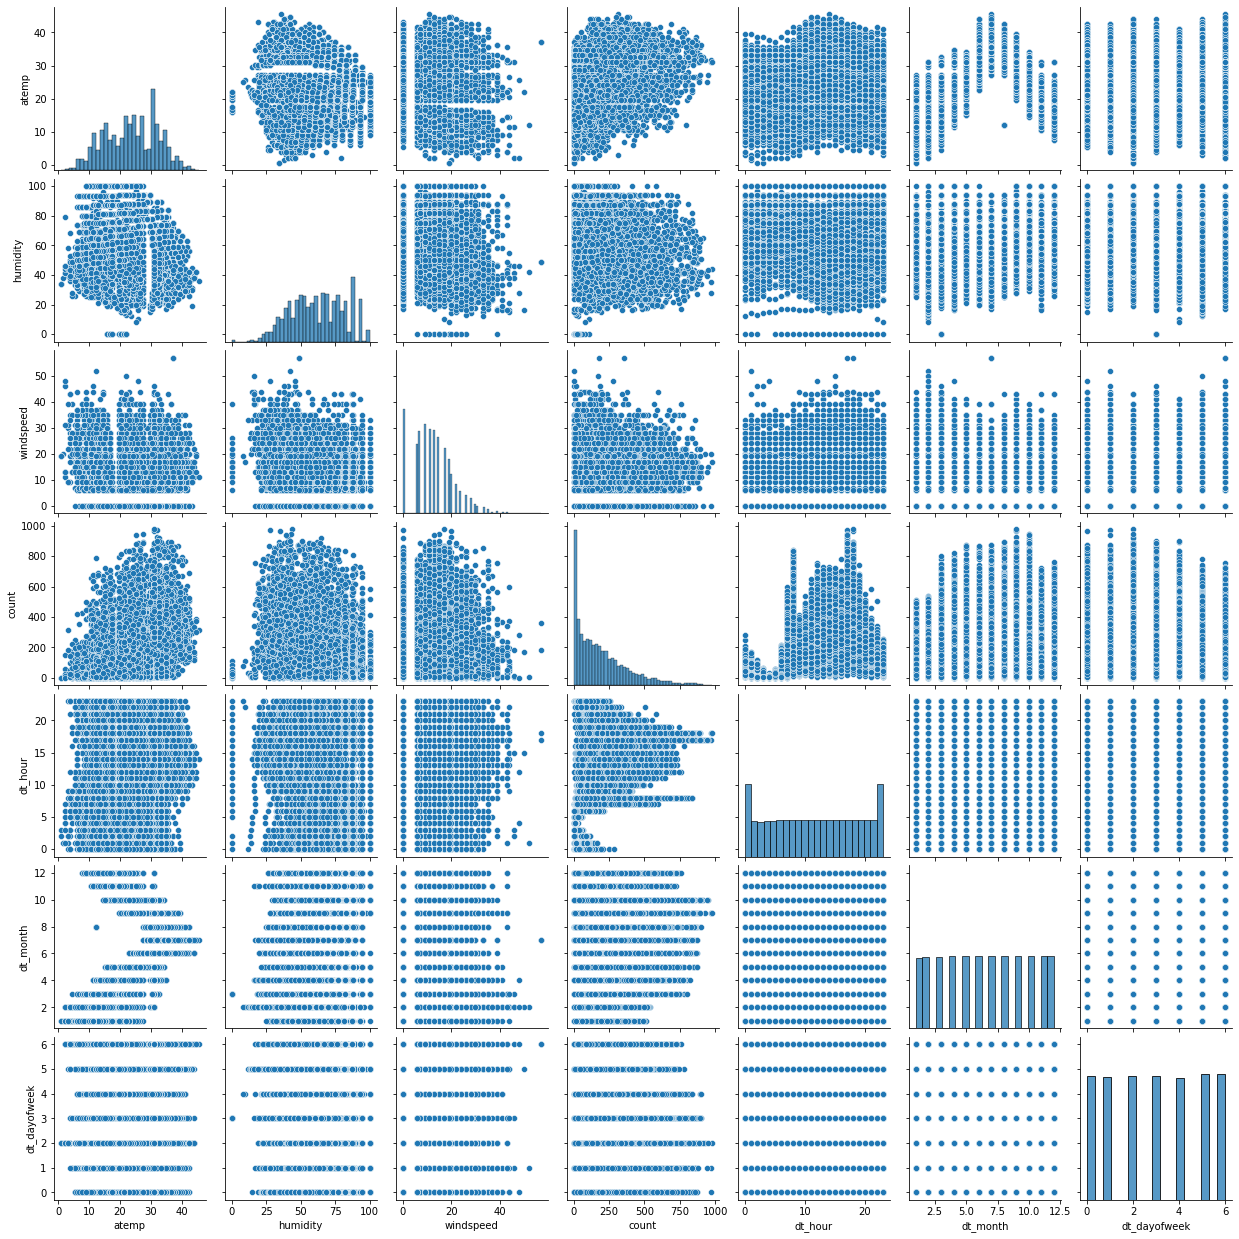

<IPython.core.display.Javascript object>

In [31]:
sns.pairplot(data)


In [32]:
data.describe().T

count        mean         std   min      25%      50%  \
atemp         10886.0   23.655084    8.474601  0.76  16.6650   24.240   
humidity      10886.0   61.886460   19.245033  0.00  47.0000   62.000   
windspeed     10886.0   12.799395    8.164537  0.00   7.0015   12.998   
count         10886.0  191.574132  181.144454  1.00  42.0000  145.000   
dt_hour       10886.0   11.541613    6.915838  0.00   6.0000   12.000   
dt_month      10886.0    6.521495    3.444373  1.00   4.0000    7.000   
dt_dayofweek  10886.0    3.013963    2.004585  0.00   1.0000    3.000   

                   75%       max  
atemp          31.0600   45.4550  
humidity       77.0000  100.0000  
windspeed      16.9979   56.9969  
count         284.0000  977.0000  
dt_hour        18.0000   23.0000  
dt_month       10.0000   12.0000  
dt_dayofweek    5.0000    6.0000

<IPython.core.display.Javascript object>

In [33]:
data_test.describe().T

count       mean        std   min      25%      50%      75%  \
atemp         6493.0  24.012865   8.782741   0.0  16.6650  25.0000  31.0600   
humidity      6493.0  64.125212  19.293391  16.0  49.0000  65.0000  81.0000   
windspeed     6493.0  12.631157   8.250151   0.0   7.0015  11.0014  16.9979   
dt_hour       6493.0  11.555367   6.912526   0.0   6.0000  12.0000  18.0000   
dt_month      6493.0   6.565070   3.429462   1.0   4.0000   7.0000  10.0000   
dt_dayofweek  6493.0   3.007239   1.997714   0.0   1.0000   3.0000   5.0000   

                   max  
atemp          50.0000  
humidity      100.0000  
windspeed      55.9986  
dt_hour        23.0000  
dt_month       12.0000  
dt_dayofweek    6.0000

<IPython.core.display.Javascript object>

In [34]:
data.sample(10)

season holiday workingday weather   atemp  humidity  windspeed  count  \
10062      4       0          0       1  20.455        40    15.0013    449   
3929       3       0          1       1  34.090        62    11.0014    586   
6416       1       0          0       1  16.665        34    23.9994    332   
3368       3       0          1       1  31.820        61     0.0000    119   
10286      4       0          1       1  12.120        56    19.0012     24   
10059      4       0          0       1  19.695        46    15.0013    504   
1168       1       0          0       1  20.455        50    27.9993     44   
10017      4       0          1       2  19.695        43    22.0028    522   
1459       2       0          1       1  25.760        28    27.9993    169   
9821       4       0          0       1  23.485        33    12.9980    597   

       dt_hour  dt_month  dt_dayofweek  
10062       15        11             6  
3929        18         9             2  
6416        14         3             6  
3368         6         8             2  
10286        0        11             2  
10059       12        11             6  
1168         9         3             6  
10017       18        11             4  
1459        16         4             2  
9821        14        10             5

<IPython.core.display.Javascript object>

In [35]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [36]:
# before one hot encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   season        10886 non-null  category
 1   holiday       10886 non-null  category
 2   workingday    10886 non-null  category
 3   weather       10886 non-null  category
 4   atemp         10886 non-null  float64 
 5   humidity      10886 non-null  int64   
 6   windspeed     10886 non-null  float64 
 7   count         10886 non-null  int64   
 8   dt_hour       10886 non-null  int64   
 9   dt_month      10886 non-null  int64   
 10  dt_dayofweek  10886 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 638.6 KB


<IPython.core.display.Javascript object>

### one hot encoding for category types before model building

In [37]:
data = pd.get_dummies(data, drop_first=True)
data_test = pd.get_dummies(data_test, drop_first=True)

<IPython.core.display.Javascript object>

In [38]:
# after one hot encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   atemp         10886 non-null  float64
 1   humidity      10886 non-null  int64  
 2   windspeed     10886 non-null  float64
 3   count         10886 non-null  int64  
 4   dt_hour       10886 non-null  int64  
 5   dt_month      10886 non-null  int64  
 6   dt_dayofweek  10886 non-null  int64  
 7   season_2      10886 non-null  uint8  
 8   season_3      10886 non-null  uint8  
 9   season_4      10886 non-null  uint8  
 10  holiday_1     10886 non-null  uint8  
 11  workingday_1  10886 non-null  uint8  
 12  weather_2     10886 non-null  uint8  
 13  weather_3     10886 non-null  uint8  
 14  weather_4     10886 non-null  uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 680.5 KB


<IPython.core.display.Javascript object>

In [39]:
# split data

# Separating features and the target column
X = data.drop("count", axis=1)
y = data["count"]

# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, shuffle=True
)
print(X_train.shape, X_test.shape, data_test.shape)

(7620, 14) (3266, 14) (6493, 14)


<IPython.core.display.Javascript object>

### Random Forest Model - to get base score

In [40]:
rf_estimator = RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

<IPython.core.display.Javascript object>

In [41]:
rf_estimator_model_train_perf = model_performance_regression(
    rf_estimator, X_train, y_train
)
print("Train performance \n")
display(rf_estimator_model_train_perf)

Train performance 



RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  25.099874  16.284524   0.980554        0.980518  16.161992

<IPython.core.display.Javascript object>

In [42]:
rf_estimator_model_test_perf = model_performance_regression(
    rf_estimator, X_test, y_test
)
print("Testing performance \n")
display(rf_estimator_model_test_perf)

Testing performance 



RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  65.870222  44.316571    0.87136        0.870806  42.040721

<IPython.core.display.Javascript object>

In [43]:
rf_tuned = rf_estimator

<IPython.core.display.Javascript object>

In [44]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n")
display(rf_tuned_model_train_perf)

Training performance 



RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  25.099874  16.284524   0.980554        0.980518  16.161992

<IPython.core.display.Javascript object>

In [45]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n")
display(rf_tuned_model_test_perf)

Testing performance 



RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  65.870222  44.316571    0.87136        0.870806  42.040721

<IPython.core.display.Javascript object>

In [46]:
file_name = "rf_tuned.csv"
genrerate_submit_data(rf_tuned,file_name)


genrating rf_tuned.csv for kaggle submission

Total negative values : 

datetime    0
count       0
dtype: int64

After replace negative values : 

datetime    0
count       0
dtype: int64


datetime  count
3704  2012-02-28 03:00:00    3.0
1156  2011-05-26 04:00:00    5.0
808   2011-04-22 16:00:00  142.0
4913  2012-07-22 13:00:00  397.0
593   2011-03-25 15:00:00  128.0
3150  2011-12-28 23:00:00   66.0
5344  2012-08-28 12:00:00  187.0
1906  2011-08-22 10:00:00  156.0
4263  2012-04-29 11:00:00  397.0
2668  2011-10-31 17:00:00  557.0


csv file rf_tuned.csv generated


<IPython.core.display.Javascript object>

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [47]:
!kaggle competitions submit -c bike-sharing-demand -f rf_tuned.csv -m "default random forest"

100%|█████████████████████████████████████████| 162k/162k [00:01<00:00, 135kB/s]
Successfully submitted to Bike Sharing Demand

<IPython.core.display.Javascript object>

In [48]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                        date                 description                                  status    publicScore  privateScore  
------------------------------  -------------------  -------------------------------------------  --------  -----------  ------------  
rf_tuned.csv                    2021-11-24 19:08:12  default random forest                        complete  0.51906      0.51906       


<IPython.core.display.Javascript object>

### Observation on Default Random Forest Model

#### Updated score of  `0.519`  -  Much better than intial Model with no features 

## Train a model using AutoGluon’s Tabular Prediction - with new features

In [49]:
# split data

# Separating features and the target column
X = data.copy()


# Splitting the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.20, random_state=1, shuffle=True)

X_train, X_val = train_test_split(X_train, test_size=0.25, random_state=1, shuffle=True)

print(X_train.shape, X_val.shape, X_test.shape, data_test.shape)

(6531, 15) (2177, 15) (2178, 15) (6493, 14)


<IPython.core.display.Javascript object>

In [50]:
label = "count"
save_path = "/Users/murali/tmp/bike_preduction_models/"
time_limit=120

predictor_default_features= TabularPredictor(
    label=label, problem_type="regression", eval_metric="root_mean_squared_error", path=save_path
).fit(train_data=X_train,presets= "best_quality",verbosity=1, time_limit=time_limit)



AutoGluon will gauge predictive performance using evaluation metric: 'root_mean_squared_error'
		`import lightgbm` failed. If you are using Mac OSX, Please try 'brew install libomp'. Detailed info: dlopen(/Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)
		`import lightgbm` failed. If you are using Mac OSX, Please try 'brew install libomp'. Detailed info: dlopen(/Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/loc

		`import lightgbm` failed. If you are using Mac OSX, Please try 'brew install libomp'. Detailed info: dlopen(/Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/murali/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)


<IPython.core.display.Javascript object>

In [51]:
predictor_default_features.leaderboard(X_train, silent=True)

model  score_test   score_val  pred_time_test  \
0    KNeighborsDist_BAG_L1   -3.358430 -115.205577        0.031997   
1     ExtraTreesMSE_BAG_L1  -24.760728  -66.855983        0.157057   
2   RandomForestMSE_BAG_L1  -25.129585  -67.834025        0.116773   
3   NeuralNetFastAI_BAG_L2  -33.308054  -61.636361        1.620887   
4      WeightedEnsemble_L3  -34.775464  -60.513137        1.912756   
5          CatBoost_BAG_L2  -35.086441  -60.961547        1.031008   
6      WeightedEnsemble_L2  -36.676376  -60.718896        0.936594   
7          CatBoost_BAG_L1  -39.264631  -60.957292        0.057712   
8     ExtraTreesMSE_BAG_L2  -39.497468  -61.757955        1.097943   
9   RandomForestMSE_BAG_L2  -41.062931  -62.101056        1.146488   
10  NeuralNetFastAI_BAG_L1  -67.315190  -77.727286        0.602659   
11   KNeighborsUnif_BAG_L1  -95.345181 -118.538726        0.028836   

    pred_time_val    fit_time  pred_time_test_marginal  \
0        0.033247    0.004700                 0.031997   
1        0.197559    0.494511                 0.157057   
2        0.200590    0.684603                 0.116773   
3        0.731261  107.962830                 0.625853   
4        1.162741  116.106669                 0.001532   
5        0.628396   82.763584                 0.035974   
6        0.539570   76.947095                 0.002393   
7        0.029464   42.480232                 0.057712   
8        0.808999   77.464107                 0.102909   
9        0.809412   78.369236                 0.151454   
10       0.111676   33.176008                 0.602659   
11       0.032660    0.005201                 0.028836   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.033247           0.004700            1       True   
1                 0.197559           0.494511            1       True   
2                 0.200590           0.684603            1       True   
3                 0.126064          31.117575            2       True   
4                 0.000262           0.082677            3       True   
5                 0.023200           5.918329            2       True   
6                 0.000281           0.111741            2       True   
7                 0.029464          42.480232            1       True   
8                 0.203803           0.618852            2       True   
9                 0.204216           1.523981            2       True   
10                0.111676          33.176008            1       True   
11                0.032660           0.005201            1       True   

    fit_order  
0           2  
1           5  
2           3  
3          11  
4          12  
5           9  
6           7  
7           4  
8          10  
9           8  
10          6  
11          1

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='model'>

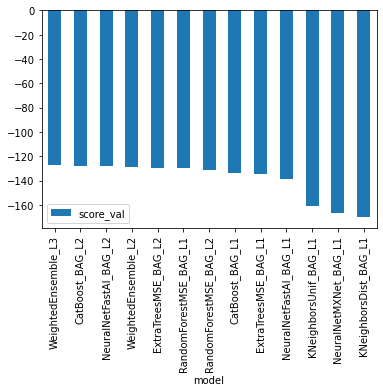

<IPython.core.display.Javascript object>

In [52]:
# Output the model's `score_val` in a bar chart to compare performance
predictor_default.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [53]:
# Evaluate the models performance on the test dataset
performance = predictor_default_features.evaluate(X_test)
performance

{'root_mean_squared_error': -59.87460511187596,
 'mean_squared_error': -3584.9683373030944,
 'mean_absolute_error': -39.876072541631835,
 'r2': 0.8948693760239502,
 'pearsonr': 0.9461857988030279,
 'median_absolute_error': -23.65253734588623}

<IPython.core.display.Javascript object>

In [54]:
file_name = "predictor_default_features.csv"
genrerate_submit_data(predictor_default_features, file_name)

genrating predictor_default_features.csv for kaggle submission

Total negative values : 

datetime    1
count       1
dtype: int64

After replace negative values : 

datetime    0
count       0
dtype: int64


datetime  count
1041  2011-05-21 09:00:00  292.0
1608  2011-07-22 00:00:00   82.0
5633  2012-09-28 13:00:00  352.0
1962  2011-08-24 18:00:00  643.0
4158  2012-04-25 02:00:00    7.0
629   2011-03-27 03:00:00    8.0
840   2011-04-24 00:00:00   88.0
1474  2011-06-27 10:00:00  191.0
2187  2011-09-22 16:00:00  282.0
5933  2012-10-31 13:00:00  274.0


csv file predictor_default_features.csv generated


<IPython.core.display.Javascript object>

#### Submit to  competition's page - `My Submissions`

In [55]:
!kaggle competitions submit -c bike-sharing-demand -f predictor_default_features.csv -m "default autogluon.tabular with new features"

100%|█████████████████████████████████████████| 162k/162k [00:00<00:00, 272kB/s]
Successfully submitted to Bike Sharing Demand

<IPython.core.display.Javascript object>

In [56]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                        date                 description                                  status    publicScore  privateScore  
------------------------------  -------------------  -------------------------------------------  --------  -----------  ------------  
predictor_default_features.csv  2021-11-24 19:10:18  default autogluon.tabular with new features  complete  0.52315      0.52315       


<IPython.core.display.Javascript object>

### Observation on Initial Model

#### Updated score of  `0.5231` and with `'root_mean_squared_error': -59.874`  - great improvement compared to initial model built with no features, Lets looks for more improvement opportunity 

## Train a model using AutoGluon’s Tabular Prediction - Hyper parameter optimization

In [57]:
# parameters tuning
label = "count"
save_path = "/Users/murali/tmp/bike_preduction_models/"

metric = "root_mean_squared_error"

train_data = X_train.copy()
val_data = X_val.copy()

time_limit = 5 * 60  # train various models for ~2 min
num_trials = (
    15  # try at most 15 different hyperparameter configurations for each type of model
)
search_strategy = "auto"  # to tune hyperparameters using Bayesian optimization routine with a local scheduler


gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    "num_boost_round": 100,  # number of boosting rounds (controls training time of GBM models)
    "num_leaves": ag.space.Int(
        lower=4, upper=100, default=35
    ),  # number of leaves in trees (integer hyperparameter)
}

knn_options = { "n_neighbors" : ag.space.Int(
        lower=3, upper=10, default=5
    )
              }

hyperparameter_tune_kwargs = (
    {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
        "num_trials": num_trials,
        "scheduler": "local",
        "searcher": search_strategy,
    }
)

hyperparameters = {
    "GBM": gbm_options,
    #"KNN":knn_options
}  # hyperparameters of each model type

presets = ['good_quality_faster_inference_only_refit', 'optimize_for_deployment']


<IPython.core.display.Javascript object>

In [58]:
predictor_tuned = TabularPredictor(
    label=label, problem_type="regression", eval_metric=metric, path=save_path
).fit(
    train_data,
    tuning_data=val_data,
    verbosity=2,
    time_limit=time_limit,
)



Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "/Users/murali/tmp/bike_preduction_models/"
AutoGluon Version:  0.3.1
Train Data Rows:    6531
Train Data Columns: 14
Tuning Data Rows:    2177
Tuning Data Columns: 14
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1238.38 MB
	Train Data (Original)  Memory Usage: 0.49 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 8 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dtype, special

Fitting model: WeightedEnsemble_L2 ... Training model for up to 299.95s of the 221.1s of remaining time.
	-57.1956	 = Validation score   (root_mean_squared_error)
	0.11s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 79.02s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/Users/murali/tmp/bike_preduction_models/")


<IPython.core.display.Javascript object>

Evaluation: root_mean_squared_error on test data: -59.60090004015911
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -59.60090004015911,
    "mean_squared_error": -3552.2672855970486,
    "mean_absolute_error": -38.69714665372537,
    "r2": 0.895828347386335,
    "pearsonr": 0.9474522536017896,
    "median_absolute_error": -22.55938720703125
}


{'root_mean_squared_error': -59.60090004015911,
 'mean_squared_error': -3552.2672855970486,
 'mean_absolute_error': -38.69714665372537,
 'r2': 0.895828347386335,
 'pearsonr': 0.9474522536017896,
 'median_absolute_error': -22.55938720703125}

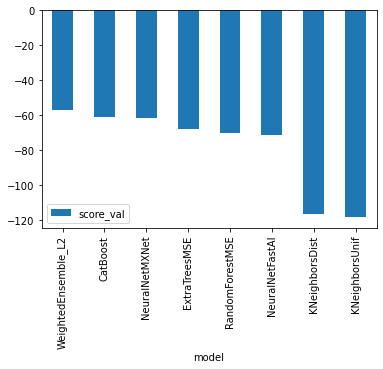

<IPython.core.display.Javascript object>

In [59]:
# Output the model's `score_val` in a bar chart to compare performance
predictor_tuned.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# Evaluate the models performance on the test dataset
performance = predictor_tuned.evaluate(X_test)
performance

In [60]:
predictor_tuned.leaderboard(train_data, silent=True)

model  score_test   score_val  pred_time_test  pred_time_val  \
0       KNeighborsDist   -3.358430 -116.086998        0.033313       0.013071   
1        ExtraTreesMSE  -24.760728  -67.714952        0.109799       0.035998   
2      RandomForestMSE  -25.129585  -69.889124        0.113634       0.035627   
3  WeightedEnsemble_L2  -33.727501  -57.195619        0.240382       0.141323   
4             CatBoost  -34.307308  -61.150120        0.007945       0.003254   
5       NeuralNetMXNet  -39.392206  -61.381219        0.230632       0.137823   
6      NeuralNetFastAI  -63.146813  -71.389938        0.060818       0.021804   
7       KNeighborsUnif  -95.345181 -118.224571        0.031688       0.014745   

    fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0   0.006504                 0.033313                0.013071   
1   0.479871                 0.109799                0.035998   
2   0.654621                 0.113634                0.035627   
3  71.836111                 0.001805                0.000246   
4   6.244961                 0.007945                0.003254   
5  65.482192                 0.230632                0.137823   
6   5.016333                 0.060818                0.021804   
7   0.008554                 0.031688                0.014745   

   fit_time_marginal  stack_level  can_infer  fit_order  
0           0.006504            1       True          2  
1           0.479871            1       True          5  
2           0.654621            1       True          3  
3           0.108958            2       True          8  
4           6.244961            1       True          4  
5          65.482192            1       True          7  
6           5.016333            1       True          6  
7           0.008554            1       True          1

<IPython.core.display.Javascript object>

In [61]:
predictor_tuned.get_model_best()

'WeightedEnsemble_L2'

<IPython.core.display.Javascript object>

In [62]:
predictor_tuned.feature_importance(data=train_data)

Computing feature importance via permutation shuffling for 14 features using 1000 rows with 3 shuffle sets...
	5.87s	= Expected runtime (1.96s per shuffle set)
	1.59s	= Actual runtime (Completed 3 of 3 shuffle sets)


importance    stddev   p_value  n    p99_high     p99_low
dt_hour       168.940105  7.585250  0.000336  3  212.404427  125.475783
atemp          64.325955  0.813567  0.000027  3   68.987782   59.664128
humidity       42.816824  7.389457  0.004891  3   85.159232    0.474417
dt_dayofweek   40.335661  1.915751  0.000376  3   51.313125   29.358198
dt_month       38.876843  3.496361  0.001343  3   58.911381   18.842305
workingday_1   34.454434  4.417503  0.002717  3   59.767215    9.141654
windspeed      16.627719  1.305716  0.001025  3   24.109616    9.145821
season_3       12.675199  1.005228  0.001045  3   18.435266    6.915133
season_4       12.650267  0.750571  0.000586  3   16.951122    8.349412
season_2       11.715249  1.184008  0.001694  3   18.499744    4.930755
weather_3      10.063969  4.009185  0.024520  3   33.037044  -12.909107
weather_2       8.742320  1.813297  0.007020  3   19.132713   -1.648073
holiday_1       2.277161  0.232770  0.001732  3    3.610961    0.943360
weather_4       0.055017  0.095292  0.211325  3    0.601053   -0.491018

<IPython.core.display.Javascript object>

In [63]:
file_name = "predictor_tuned.csv"
genrerate_submit_data(predictor_tuned, file_name)

genrating predictor_tuned.csv for kaggle submission

Total negative values : 

datetime    191
count       191
dtype: int64

After replace negative values : 

datetime    0
count       0
dtype: int64


datetime  count
4907  2012-07-22 07:00:00   35.0
2714  2011-11-21 15:00:00  145.0
2389  2011-10-20 02:00:00   24.0
1664  2011-07-24 08:00:00  156.0
1928  2011-08-23 08:00:00  557.0
925   2011-04-27 13:00:00  142.0
2612  2011-10-29 09:00:00   59.0
3960  2012-03-28 20:00:00  333.0
88    2011-01-23 18:00:00   74.0
3761  2012-03-20 13:00:00  239.0


csv file predictor_tuned.csv generated


<IPython.core.display.Javascript object>

#### Submit to  competition's page - `My Submissions`

In [64]:
!kaggle competitions submit -c bike-sharing-demand -f predictor_tuned.csv -m "tuned autogluon.tabular"

100%|█████████████████████████████████████████| 162k/162k [00:00<00:00, 372kB/s]
Successfully submitted to Bike Sharing Demand

<IPython.core.display.Javascript object>

In [65]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                        date                 description                                  status    publicScore  privateScore  
------------------------------  -------------------  -------------------------------------------  --------  -----------  ------------  
predictor_tuned.csv             2021-11-24 19:11:42  tuned autogluon.tabular                      complete  0.65488      0.65488       


<IPython.core.display.Javascript object>


### Observation on Tuned Model

#### Updated score of  `0.654` and with `'root_mean_squared_error':-59.60`  - great improvement compared to initial model  - but not good as default model built with new features

## Train a model using AutoGluon’s Tabular Prediction with Stacking

In [66]:
predictor_stack = TabularPredictor(
    label=label, problem_type="regression", eval_metric=metric, path=save_path
).fit(
    train_data,
    num_bag_folds=10,
    num_bag_sets=2,
    num_stack_levels=2,
    auto_stack=True,
    time_limit=120,
    hyperparameters={
        "NN": {"num_epochs": 2},
        "GBM": {"num_boost_round": 100, "learning_rate": ag.Real(0.01, 0.1)},
    },
)

Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "/Users/murali/tmp/bike_preduction_models/"
AutoGluon Version:  0.3.1
Train Data Rows:    6531
Train Data Columns: 14
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1301.82 MB
	Train Data (Original)  Memory Usage: 0.37 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 8 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) :  2 | ['atemp', 'windsp

<IPython.core.display.Javascript object>

In [67]:
predictor_stack.leaderboard(train_data, silent=True)

model  score_test   score_val  pred_time_test  \
0  NeuralNetMXNet_BAG_L2 -209.129868 -211.825559        9.040887   
1    WeightedEnsemble_L3 -209.129868 -211.825559        9.041722   
2  NeuralNetMXNet_BAG_L3 -217.064736 -219.257222       13.567709   
3    WeightedEnsemble_L4 -217.064736 -219.257222       13.568482   
4  NeuralNetMXNet_BAG_L1 -231.468510 -233.290015        4.492041   
5    WeightedEnsemble_L2 -231.468510 -233.290015        4.493362   

   pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0       4.331316  36.467474                 4.548846                2.168966   
1       4.331601  36.468613                 0.000835                0.000285   
2       6.523004  54.824123                 4.526822                2.191688   
3       6.523288  54.825486                 0.000773                0.000285   
4       2.162349  18.121851                 4.492041                2.162349   
5       2.162625  18.122972                 0.001321                0.000276   

   fit_time_marginal  stack_level  can_infer  fit_order  
0          18.345623            2       True          3  
1           0.001139            3       True          4  
2          18.356649            3       True          5  
3           0.001363            4       True          6  
4          18.121851            1       True          1  
5           0.001121            2       True          2

<IPython.core.display.Javascript object>

Evaluation: root_mean_squared_error on test data: -211.2523084407959
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -211.2523084407959,
    "mean_squared_error": -44627.537821565704,
    "mean_absolute_error": -189.08098397022874,
    "r2": -0.3087203166835937,
    "pearsonr": 0.5256659427899241,
    "median_absolute_error": -201.72705078125
}


{'root_mean_squared_error': -211.2523084407959,
 'mean_squared_error': -44627.537821565704,
 'mean_absolute_error': -189.08098397022874,
 'r2': -0.3087203166835937,
 'pearsonr': 0.5256659427899241,
 'median_absolute_error': -201.72705078125}

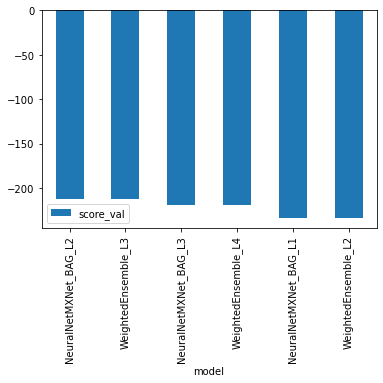

<IPython.core.display.Javascript object>

In [68]:
# Output the model's `score_val` in a bar chart to compare performance
predictor_stack.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

# Evaluate the models performance on the test dataset
performance = predictor_stack.evaluate(X_test)
performance

In [69]:
file_name = "predictor_stack.csv"
genrerate_submit_data(predictor_stack, file_name)

genrating predictor_stack.csv for kaggle submission

Total negative values : 

datetime    0
count       0
dtype: int64

After replace negative values : 

datetime    0
count       0
dtype: int64


datetime  count
2518  2011-10-25 11:00:00  350.0
6194  2012-11-30 11:00:00  323.0
5462  2012-09-21 10:00:00  382.0
125   2011-01-25 09:00:00  280.0
4176  2012-04-25 20:00:00  398.0
4946  2012-07-23 22:00:00  511.0
2080  2011-08-30 05:00:00  297.0
102   2011-01-24 09:00:00  266.0
752   2011-04-20 08:00:00  312.0
5975  2012-11-21 07:00:00  298.0


csv file predictor_stack.csv generated


<IPython.core.display.Javascript object>

#### Submit to  competition's page - `My Submissions`

In [70]:
!kaggle competitions submit -c bike-sharing-demand -f predictor_stack.csv -m "stacked autogluon.tabular"

100%|█████████████████████████████████████████| 165k/165k [00:00<00:00, 356kB/s]
Successfully submitted to Bike Sharing Demand

<IPython.core.display.Javascript object>

In [71]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                        date                 description                                  status    publicScore  privateScore  
------------------------------  -------------------  -------------------------------------------  --------  -----------  ------------  
predictor_stack.csv             2021-11-24 19:13:14  stacked autogluon.tabular                    complete  1.81659      1.81659       


<IPython.core.display.Javascript object>

### observation on stacking

* not good as inital model build on new features or hyper tuned model. 


# Performance Report

### Top Scores

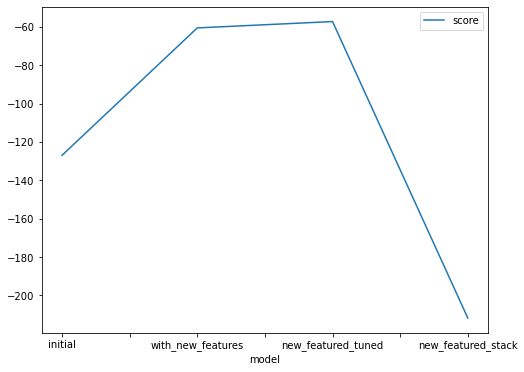

<IPython.core.display.Javascript object>

In [74]:
# Taking the top model score
fig = (
    pd.DataFrame(
        {
            "model": [
                "initial",
                "with_new_features",
                "new_featured_tuned",
                "new_featured_stack",
            ],
            "score": [
                predictor_default.leaderboard(silent=True)["score_val"][0],
                predictor_default_features.leaderboard(silent=True)["score_val"][0],
                predictor_tuned.leaderboard(silent=True)["score_val"][0],
                predictor_stack.leaderboard(silent=True)["score_val"][0],
            ],
        }
    )
    .plot(x="model", y="score", figsize=(8, 6))
    .get_figure()
)
fig.savefig("model_train_score.png")

### Top kaggle score

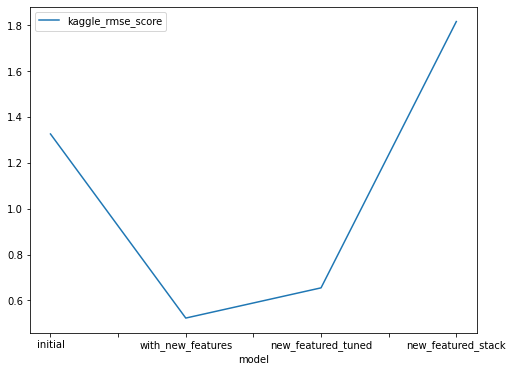

<IPython.core.display.Javascript object>

In [75]:
# Taking the top kaggle model score
fig = (
    pd.DataFrame(
        {
            "model": [
                "initial",
                "with_new_features",
                "new_featured_tuned",
                "new_featured_stack",
            ],
            "kaggle_rmse_score": [1.32582, 0.5231, 0.65488, 1.8161,],
        }
    )
    .plot(x="model", y="kaggle_rmse_score", figsize=(8, 6))
    .get_figure()
)
fig.savefig("model_kaggle_rmse_score.png")

# Summary

* we clearly see default tabular model built with new feature has better score rates compared to other models we tried.

## Next steps 

* try different hyper parameter approach to see if we can beat default model 

